<a href="https://colab.research.google.com/github/AadityaRJ01/Python-Project/blob/main/Copy_of_project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Scores by Gender:
         math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203 

Average Scores by Parental Level of Education:
                              math_score  reading_score  writing_score
parental_level_of_education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268 

T-Test Results (Gender):
Math: t=5.38, p=0.0000
Reading: t=-7.96, p=0.0000
Writing: t=-9.98, p=0.0000

ANOVA Results (Parental Education):
Math: F=6.52, p=0.0000
Rea

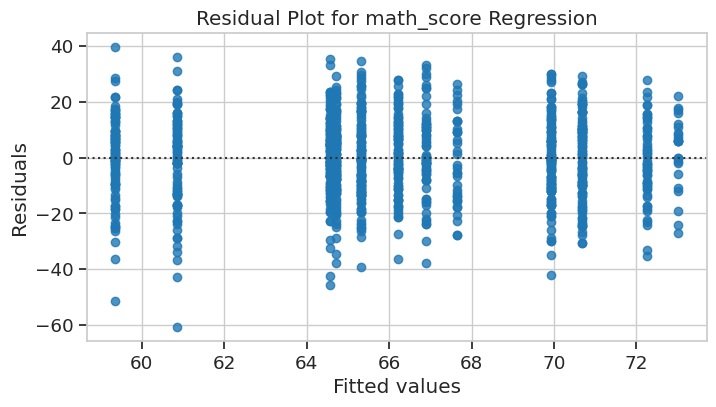

Regression summary for reading_score:

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     18.24
Date:                Tue, 27 May 2025   Prob (F-statistic):           3.67e-20
Time:                        10:27:11   Log-Likelihood:                -4047.2
No. Observations:                1000   AIC:                             8108.
Df Residuals:                     993   BIC:                             8143.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

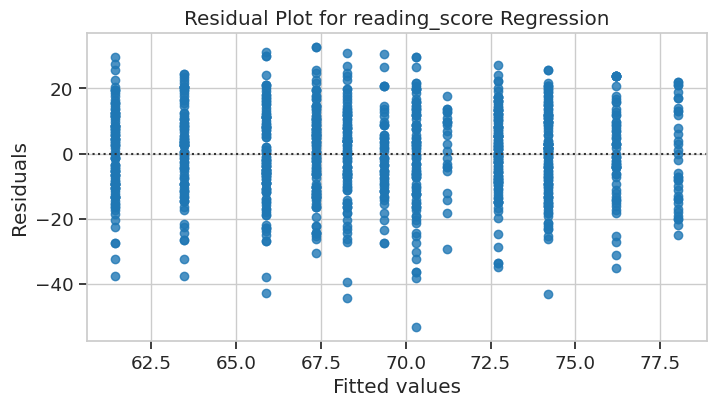

Regression summary for writing_score:

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     29.40
Date:                Tue, 27 May 2025   Prob (F-statistic):           1.59e-32
Time:                        10:27:11   Log-Likelihood:                -4057.7
No. Observations:                1000   AIC:                             8129.
Df Residuals:                     993   BIC:                             8164.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

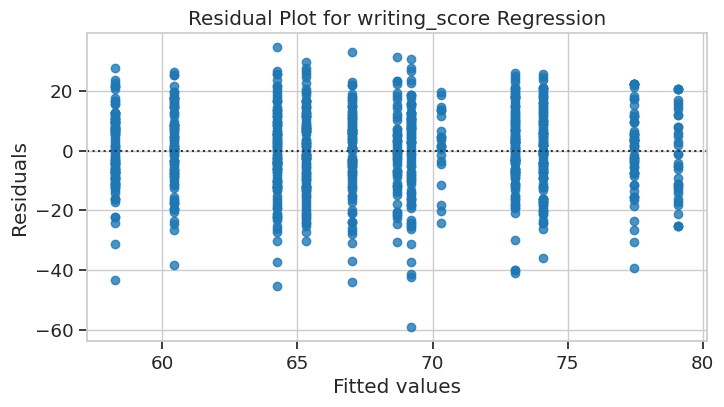

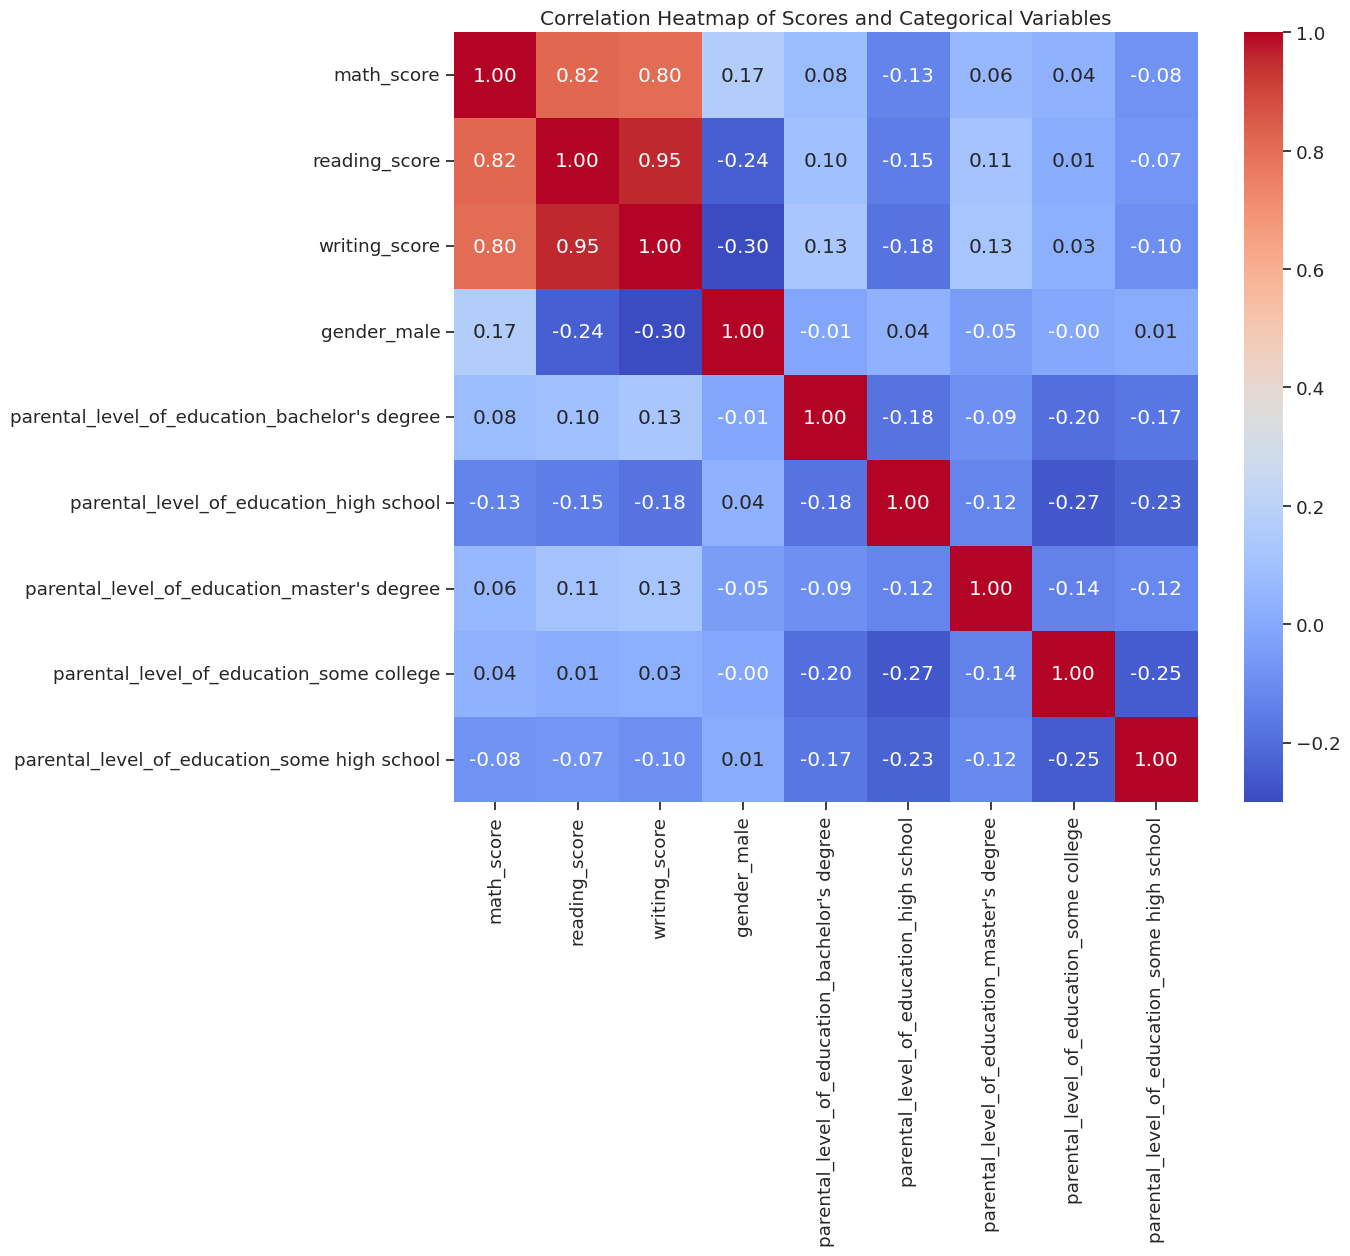

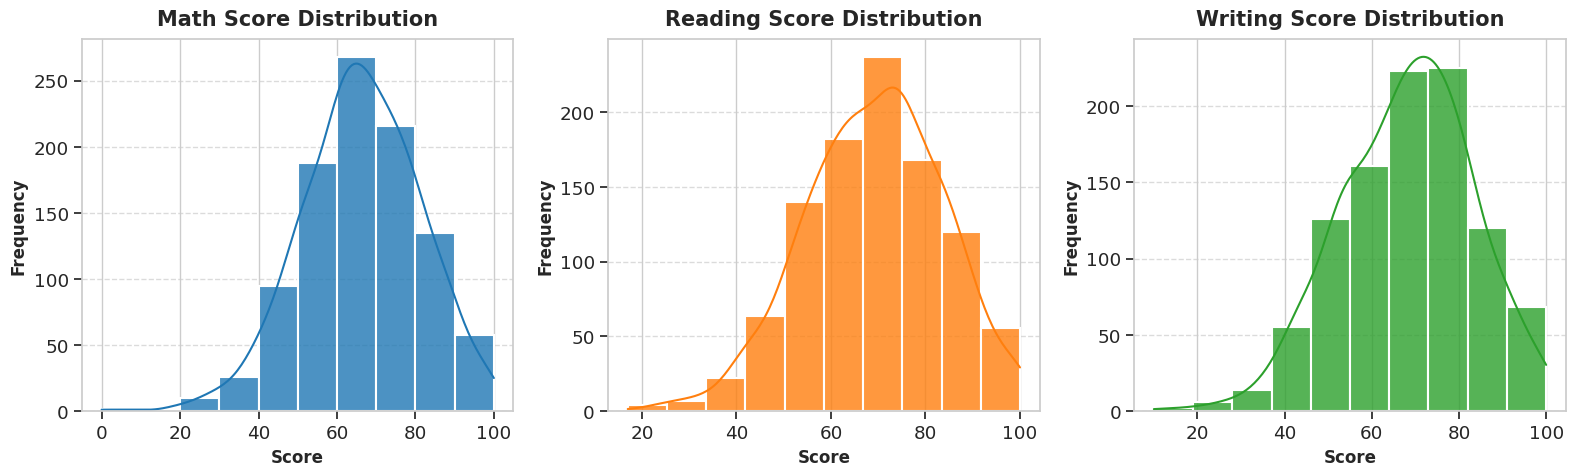

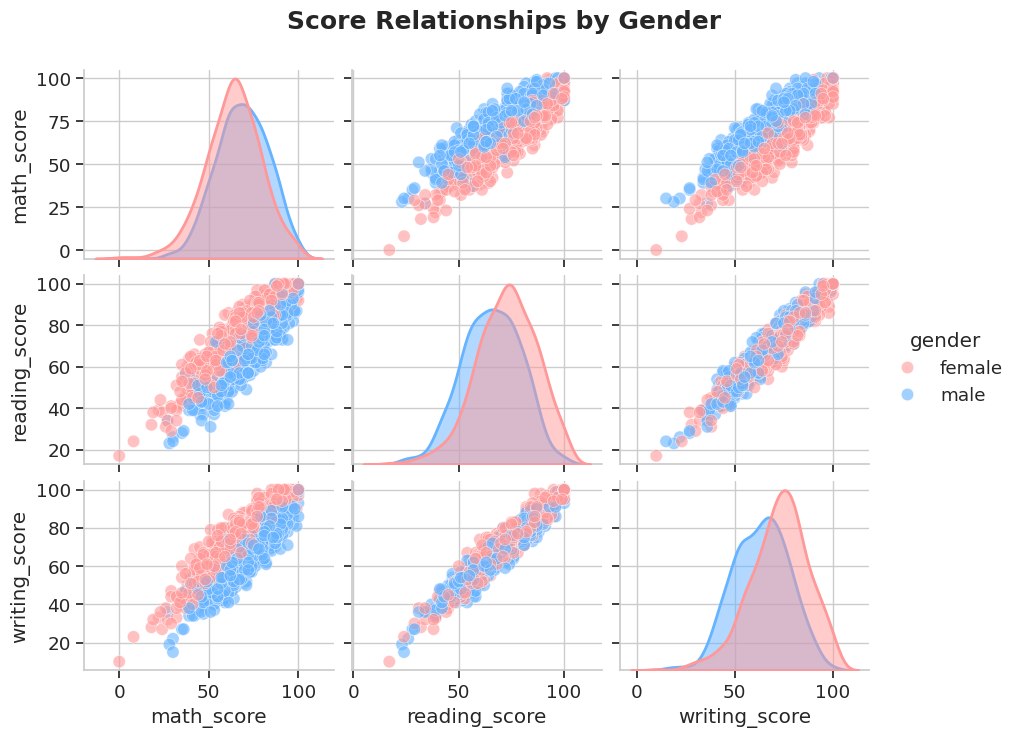

<ipython-input-10-6c7c9380f7f0>:176: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Parental Education', bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# Set up consistent styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
colors = sns.color_palette("RdBu_r", 10)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# Sample data creation for demonstration
# (Replace with df = pd.read_csv("StudentsPerformance.csv") if file is available)
sample_data = {
    'gender': ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male',
               'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male'],
    'parental_level_of_education': ['bachelor', 'some college', 'master', 'associate',
                                   'high school', 'some college', 'master', 'associate',
                                   'bachelor', 'some college', 'master', 'associate',
                                   'high school', 'some college', 'master', 'associate'],
    'math_score': [72, 69, 90, 47, 76, 88, 95, 60, 81, 72, 88, 65, 70, 78, 85, 63],
    'reading_score': [72, 90, 95, 57, 78, 85, 92, 65, 85, 75, 90, 70, 75, 82, 88, 69],
    'writing_score': [74, 88, 93, 44, 75, 80, 90, 60, 82, 71, 88, 68, 73, 79, 85, 65]
}

# Create DataFrame and clean column names
# Load the dataset
df = pd.read_csv("https://drive.google.com/uc?id=1hRZRmJm0qouRZ9Q3CrRp5rTabjuCyphn")

# Clean column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# --- Descriptive Statistics ---

# Mean scores by gender
gender_scores = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()
print("Average Scores by Gender:\n", gender_scores, "\n")

# Mean scores by parental level of education
parent_scores = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()
print("Average Scores by Parental Level of Education:\n", parent_scores, "\n")

# --- Statistical Tests ---

# 1. T-test between male and female students for each subject
math_ttest = ttest_ind(df[df.gender == 'male'].math_score, df[df.gender == 'female'].math_score)
reading_ttest = ttest_ind(df[df.gender == 'male'].reading_score, df[df.gender == 'female'].reading_score)
writing_ttest = ttest_ind(df[df.gender == 'male'].writing_score, df[df.gender == 'female'].writing_score)

print("T-Test Results (Gender):")
print(f"Math: t={math_ttest.statistic:.2f}, p={math_ttest.pvalue:.4f}")
print(f"Reading: t={reading_ttest.statistic:.2f}, p={reading_ttest.pvalue:.4f}")
print(f"Writing: t={writing_ttest.statistic:.2f}, p={writing_ttest.pvalue:.4f}\n")

# 2. ANOVA for parental education for each subject
math_anova = f_oneway(*[group['math_score'] for _, group in df.groupby('parental_level_of_education')])
reading_anova = f_oneway(*[group['reading_score'] for _, group in df.groupby('parental_level_of_education')])
writing_anova = f_oneway(*[group['writing_score'] for _, group in df.groupby('parental_level_of_education')])

print("ANOVA Results (Parental Education):")
print(f"Math: F={math_anova.statistic:.2f}, p={math_anova.pvalue:.4f}")
print(f"Reading: F={reading_anova.statistic:.2f}, p={reading_anova.pvalue:.4f}")
print(f"Writing: F={writing_anova.statistic:.2f}, p={writing_anova.pvalue:.4f}\n")

# --- Advanced Analysis ---

# 3. Chi-Square test of independence: Gender vs Parental Education
contingency_table = pd.crosstab(df['gender'], df['parental_level_of_education'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test: Gender vs Parental Level of Education")
print(f"Chi2 Statistic = {chi2:.2f}, p-value = {p:.4f}, Degrees of Freedom = {dof}\n")
print("Contingency Table:")
print(contingency_table, "\n")

# 4. Effect size (Cohen's d) for Gender differences in scores
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)*2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

print("Effect Size (Cohen's d) for Gender differences:")
numeric_cols = ['math_score', 'reading_score', 'writing_score']
for subject in numeric_cols:
    males = df[df.gender == 'male'][subject]
    females = df[df.gender == 'female'][subject]
    d = cohen_d(males, females)
    print(f"{subject}: Cohen's d = {d:.3f}")
print()

# 5. Linear Regression: Predict Scores using Gender and Parental Education

# Encode gender as binary
df['gender_code'] = df['gender'].map({'male': 1, 'female': 0})
df_reg = df.copy()  # no need for manual dummy vars, use C() in formula

print("Linear Regression Results:")

for subject in numeric_cols:
    # Use C() for parental_level_of_education categorical variable
    formula = f"{subject} ~ gender_code + C(parental_level_of_education)"
    model = smf.ols(formula=formula, data=df_reg).fit()

    print(f"Regression summary for {subject}:\n")
    print(model.summary())
    print("\n")

    # Plot regression residuals vs fitted values
    plt.figure(figsize=(8,4))
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=False, line_kws={'color': 'red'})
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {subject} Regression')
    plt.show()
print()
# ----- Visualizations -----

# 1. Correlation Heatmap
dummies = pd.get_dummies(df[['gender', 'parental_level_of_education']], drop_first=True)
corr_data = pd.concat([df[numeric_cols], dummies], axis=1)
corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Scores and Categorical Variables")
plt.show()

# 2. Histograms of Scores
plt.figure(figsize=(16, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors for each subject
for i, (subject, color) in enumerate(zip(['math_score', 'reading_score', 'writing_score'], colors), 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[subject], bins=10, kde=True, color=color,
                 edgecolor='white', linewidth=1.5, alpha=0.8)
    plt.title(f"{subject.replace('_', ' ').title()} Distribution",
              fontsize=15, weight='bold', pad=10)
    plt.xlabel('Score', fontsize=12, weight='bold')
    plt.ylabel('Frequency', fontsize=12, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('score_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Pairplot by Gender
gender_pair = sns.pairplot(
    df, vars=['math_score', 'reading_score', 'writing_score'],
    hue='gender', palette=['#ff9999', '#66b3ff'],
    height=2.5, aspect=1.2,
    diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'w', 'linewidth': 0.5},
    diag_kws={'alpha': 0.5, 'linewidth': 2}
)
gender_pair.fig.subplots_adjust(top=0.9)
gender_pair.fig.suptitle("Score Relationships by Gender",
                          fontsize=18, weight='bold', y=0.98)
plt.savefig('gender_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Pairplot by Parental Education
edu_colors = sns.color_palette("tab10", n_colors=len(df['parental_level_of_education'].unique()))
edu_pair = sns.pairplot(
    df, vars=['math_score', 'reading_score', 'writing_score'],
    hue='parental_level_of_education', palette=edu_colors,
    height=2.5, aspect=1.2,
    diag_kind='kde', plot_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'none'},
    diag_kws={'alpha': 0.5, 'linewidth': 2}
)
edu_pair.fig.subplots_adjust(top=0.9)
edu_pair.fig.suptitle("Score Relationships by Parental Education",
                       fontsize=18, weight='bold', y=0.98)
# Improve legend placement and size
plt.legend(title='Parental Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('education_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Standard Errors note
print("\nNotes:")
print("[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.")